In [1]:
import numpy as np
import pandas as pd

import cv2
import tensorflow as tf
import tensorflow_hub as hub

import PIL.Image as Image

from keras import layers
from keras.models import Sequential


In [2]:
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.10.0
Hub version: 0.12.0
GPU is available


In [3]:
img_shape = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4", input_shape=img_shape+(3,))
])

In [7]:
data_dir = 'Dataset/training/training'

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Dataset/training/training')

In [9]:
#list 5 images
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('Dataset/training/training/n0/n0018.jpg'),
 WindowsPath('Dataset/training/training/n0/n0019.jpg'),
 WindowsPath('Dataset/training/training/n0/n0020.jpg'),
 WindowsPath('Dataset/training/training/n0/n0021.jpg'),
 WindowsPath('Dataset/training/training/n0/n0022.jpg')]

In [10]:
n0 = list(data_dir.glob('n0/*'))

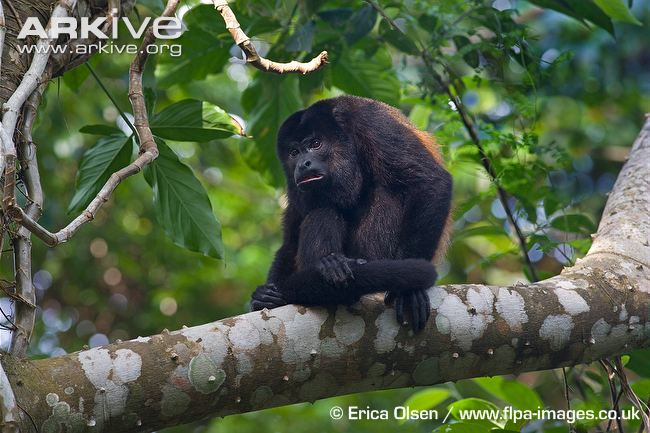

In [13]:
Image.open(str(n0[8]))

In [29]:
monkey_images_dict = {
    'n0': list(data_dir.glob('n0/*')),
    'n1': list(data_dir.glob('n1/*')),
    'n2': list(data_dir.glob('n2/*')),
    'n3': list(data_dir.glob('n3/*')),
    'n4': list(data_dir.glob('n4/*')),
    'n5': list(data_dir.glob('n5/*')),
    'n6': list(data_dir.glob('n6/*')),
    'n7': list(data_dir.glob('n7/*')),
    'n8': list(data_dir.glob('n8/*')),
    'n9': list(data_dir.glob('n9/*'))
}

monkey_labels = {
    'n0': 0,
    'n1': 1,
    'n2': 2 , 
    'n3': 3,
    'n4': 4,
    'n5': 5,
    'n6': 6,
    'n7': 7,
    'n8': 8,
    'n9': 9
}

In [30]:
X, y = [], []

for monkey_name, images in monkey_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(monkey_labels[monkey_name])


In [32]:
X = np.array(X)
y = np.array(y)

In [33]:
X_scaled = X/255

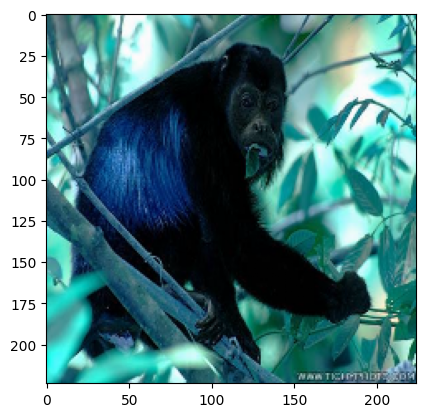

In [34]:
import matplotlib.pyplot as plt
plt.imshow(X_scaled[0])

In [35]:
feature_extractor = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4", input_shape=(224, 224, 3),trainable=False)

In [36]:
num_classes= 10

model = Sequential([
    feature_extractor,
    layers.Dense(num_classes, activation='softmax')
])

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(X_scaled, y, epochs=5)

Epoch 1/5
35/35 [==============================] - 15s 33ms/step - loss: 1.3126 - accuracy: 0.6566
Epoch 2/5
35/35 [==============================] - 1s 31ms/step - loss: 0.3959 - accuracy: 0.9281
Epoch 3/5
35/35 [==============================] - 1s 32ms/step - loss: 0.2331 - accuracy: 0.9590
Epoch 4/5
35/35 [==============================] - 1s 32ms/step - loss: 0.1654 - accuracy: 0.9754
Epoch 5/5
35/35 [==============================] - 1s 30ms/step - loss: 0.1260 - accuracy: 0.9891


In [39]:
data_test_dir = 'Dataset/validation/validation'
data_test_dir = pathlib.Path(data_test_dir)
X_test, y_test = [], []
monkey_images_test_dict = {
    'n0': list(data_test_dir.glob('n0/*')),
    'n1': list(data_test_dir.glob('n1/*')),
    'n2': list(data_test_dir.glob('n2/*')),
    'n3': list(data_test_dir.glob('n3/*')),
    'n4': list(data_test_dir.glob('n4/*')),
    'n5': list(data_test_dir.glob('n5/*')),
    'n6': list(data_test_dir.glob('n6/*')),
    'n7': list(data_test_dir.glob('n7/*')),
    'n8': list(data_test_dir.glob('n8/*')),
    'n9': list(data_test_dir.glob('n9/*'))
}
for monkey_name, images in monkey_images_test_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X_test.append(resized_img)
        y_test.append(monkey_labels[monkey_name])

In [40]:
model.evaluate(np.array(X_test)/255, np.array(y_test))

9/9 [==============================] - 4s 32ms/step - loss: 0.2375 - accuracy: 0.9522


[0.23754310607910156, 0.9522058963775635]